# Submetric Bus Accuracy
This metric was chosen because most people use the bus as their primary means of transportation in cities, and even those who only occasionally use it can have their days ruined by a late (or early) bus. It's best to know to what degree buses in one's neighborhood (and the neighborhood of their workplace), so that they can arrive places on time.

In [32]:
# making sure everything is imported (and not forgotten later)
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#turning tsv file into data frame
bus_accuracy = pd.read_csv('Bus_Accuracy.tsv', delimiter='\t')
#example
bus_accuracy.head()

,route,ridership_route_code,route_full_name,current_garage,mode,month_start,year_month,day_type,on_time_percent,data_source
0,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,WEEKDAY,0.6837,Clever
1,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SAT.,0.6977,Clever
2,1,001,1 - FREEPORT ROAD,Ross,Bus,2017-01-01,201701,SUN.,0.6280,Clever
3,2,002,2 - MOUNT ROYAL,Ross,Bus,2017-01-01,201701,WEEKDAY,0.6978,Clever
4,4,004,4 - TROY HILL,Ross,Bus,2017-01-01,201701,WEEKDAY,0.7438,Clever


In [7]:
# list of dictionaries of what routes are in what neighborhoods
neighborhood = [
    {"name": "Allegheny Center", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "029", "P1", "P2", "P3", "P7"]},
    {"name": "Allegheny West", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "029", "P1", "P2", "P3", "P7"]},
    {"name": "Allentown", "codes": ["041", "043", "044U", "048", "051", "054", "Y1"]},
    {"name": "Arlington", "codes": ["051", "053L", "054"]},
    {"name": "Arlington Heights", "codes": ["044U", "048", "051"]},
    {"name": "Banksville", "codes": ["031", "038", "Y1", "Y46"]},
    {"name": "Bedford Dwellings", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Beechview", "codes": ["039", "041", "042", "Y1", "Y45"]},
    {"name": "Beltzhoover", "codes": ["040", "041", "044U", "048"]},
    {"name": "Bloomfield", "codes": ["054", "064", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "Bluff", "codes": ["051L", "053L", "056", "058", "093", "099", "P1", "P2", "P3"]},
    {"name": "Bon Air", "codes": ["044U", "048"]},
    {"name": "Brighton Heights", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12"]},
    {"name": "Brookline", "codes": ["036", "039", "041", "044U", "Y45"]},
    {"name": "California-Kirkbride", "codes": ["001", "008", "013", "015", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "P1", "P2", "P3", "P7"]},
    {"name": "Carrick", "codes": ["044U", "045", "046", "Y1", "Y45"]},
    {"name": "CentralBusinessDistrict", "codes": ["001", "002", "004", "006", "007", "008", "011", "012", "013", "014", "015", "016", "017", "018", "019L", "020", "021", "022", "024", "026", "027", "028X", "029", "031", "036", "038", "039", "040", "041", "043", "044U", "048", "051", "052L", "053L", "054", "056", "057", "058", "059", "061A", "061B", "061C", "064", "065", "067", "068", "069", "071A", "071B", "071C", "071D", "074", "075", "077", "P1", "P2", "P3", "P7", "Y1", "Y45"]},
    {"name": "CentralLawrenceville", "codes": ["054", "064", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "Central Northside", "codes":["001", "006", "008", "013", "016", "017", "018", "054", "P7"]},
    {"name": "Central Oakland", "codes": ["028X", "058", "059", "061A", "061B", "061C", "061D", "067", "069"]},
    {"name": "ChartiersCity", "codes": ["020", "031", "0O1", "O12"]},
    {"name": "Chateau", "codes": ["001", "008", "012", "013", "016", "017", "018", "019L", "021", "022", "023", "024", "025", "027", "P1", "P2", "P3", "P7"]},
    {"name": "CraftonHeights", "codes": ["020", "036", "038", "0O1"]},
    {"name": "CrawfordRoberts", "codes": ["081", "083", "086", "087", "088", "089", "P1", "P2", "P3"]},
    {"name": "DuquesneHeights", "codes": ["020", "Y1", "Y46", "038"]},
    {"name": "EastAllegheny", "codes": ["001", "011", "016", "017", "018", "019L", "054", "P1", "P2", "P3", "P7"]},
    {"name": "EastCarnegie", "codes": ["036", "O01", "031", "0O1"]},
    {"name": "EastHills", "codes": ["074", "079", "086", "087", "089"]},
    {"name": "EastLiberty", "codes": ["071A", "071B", "071C", "071D", "074", "075", "077", "081", "082", "086", "087", "089", "P1", "P2", "P3"]},
    {"name": "Elliott", "codes": ["020", "031"]},
    {"name": "Esplen", "codes": ["020", "O1"]},
    {"name": "Fairywood", "codes": ["020", "0O1"]},
    {"name": "Fineview", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12"]},
    {"name": "Friendship", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Garfield", "codes": ["086", "087", "088", "089", "091", "093"]},
    {"name": "GlenHazel", "codes": ["059", "093"]},
    {"name": "Greenfield", "codes": ["052L", "093", "Y1", "Y45"]},
    {"name": "Hays", "codes": ["059"]},
    {"name": "Hazelwood", "codes": ["053L", "056", "057", "093"]},
    {"name": "HighlandPark", "codes": ["071A", "071B", "071C", "071D", "074", "075", "077", "086", "087", "089"]},
    {"name": "HomewoodNorth", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "HomewoodSouth", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "HomewoodWest", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Knoxville", "codes": ["040", "041", "044U", "048", "051"]},
    {"name": "Larimer", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "LincolnLemingtonBelmar", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Lincoln Place", "codes": ["055", "056", "057"]},
    {"name": "LowerLawrenceville", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Manchester", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "MarshallShadeland", "codes": ["001", "015", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "MiddleHill", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "Morningside", "codes": ["071B", "075"]},
    {"name": "MtOliver", "codes": ["051", "053L"]},
    {"name": "MtWashington", "codes": ["038", "Y1", "Y45"]},
    {"name": "NewHomestead", "codes": ["059"]},
    {"name": "NorthOakland", "codes": ["028X", "054", "075", "071A", "071B", "071C", "071D", "082", "P1", "P2", "P3"]},
    {"name": "NorthPointBreeze", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "NorthShore", "codes": ["001", "011", "016", "017", "018", "019L", "054", "P1", "P2", "P3", "P7"]},
    {"name": "NorthviewHeights", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "Oakwood", "codes": ["051", "053L"]},
    {"name": "Overbrook", "codes": ["039", "040", "041", "044U", "048"]},
    {"name": "PerryNorth", "codes": ["001", "008", "013", "014", "016", "017", "018", "019L", "020", "024", "027", "O12", "P1", "P2", "P3", "P7"]},
    {"name": "PerrySouth", "codes": ["044U", "048"]},
    {"name": "PointBreeze", "codes": ["061A", "061B", "069", "071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "PolishHill", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "Regent Square", "codes": ["061A", "061B", "067", "069", "P68"]},    
    {"name": "Ridgemont", "codes": ["G2"]},    
    {"name": "Saint Clair", "codes": ["048", "048A", "051", "051L"]},    
    {"name": "Shadyside", "codes": ["071A", "071B", "071C", "071D", "075", "077", "082", "P1", "P3"]},    
    {"name": "Sheraden", "codes": ["001", "016", "017", "018", "020", "024", "027", "28X", "051", "P7"]},    
    {"name": "South Oakland", "codes": ["058", "059", "061A", "061B", "061C", "061D", "067", "069", "P3", "P10"]},    
    {"name": "South Shore", "codes": []},    
    {"name": "South Side Flats", "codes": ["048", "051", "051L", "052L", "054", "Y1", "Y45"]},
    {"name": "South Side Slopes", "codes": ["048", "051", "051L", "052L", "053", "054", "056", "057", "Y1", "Y45"]},
    {"name": "Spring Garden", "codes": ["001", "016", "017", "018", "019L", "500", "054", "P12"]},
    {"name": "Spring Hill Cityview", "codes": ["001", "016", "017", "018", "019L", "500", "054", "P12"]},
    {"name": "Squirrel Hill North", "codes": ["061A", "061B", "061C", "064", "065", "067", "069", "071B", "074", "075", "077", "082", "086", "093"]},
    {"name": "Squirrel Hill South", "codes": ["061A", "061B", "061C", "064", "065", "067", "069", "071B", "074", "075", "077", "082", "086", "093"]},
    {"name": "StantonHeights", "codes": ["075", "086", "087", "089"]},
    {"name": "StripDistrict", "codes": ["054", "086", "087", "088", "089"]},
    {"name": "SummerHill", "codes": ["001", "002", "012", "013", "016", "017", "018", "019L", "500", "P1", "P2", "P3", "P7", "P68", "P71"]},
    {"name": "SwisshelmPark", "codes": ["061A", "061B", "061C", "064", "Y46"]},
    {"name": "TerraceVillage", "codes": ["056", "057", "058", "093"]},
    {"name": "TroyHill", "codes": ["001", "006A", "006B", "006C", "006D", "013", "016", "017", "018", "019L", "054", "088", "091", "093", "P1", "P2", "P3", "P7"]},
    {"name": "UpperHill", "codes": ["071A", "071B", "071C", "071D", "074", "077", "P17"]},
    {"name": "UpperLawrenceville", "codes": ["054", "064", "086", "087", "088", "089"]},
    {"name": "WestEnd", "codes": ["020", "031"]},
    {"name": "WestOakland", "codes": ["056", "057", "058", "093"]},
    {"name": "Westwood", "codes": ["020", "031", "038", "Y1", "Y46"]},
    {"name": "Windgap", "codes": ["020", "031"]}]

In [28]:
results = []
#iterating through each dictionary in list
for code_dict in neighborhood:
    name = code_dict['name']
    codes = code_dict['codes']
    # separating info
    df_filtered = bus_accuracy[bus_accuracy['ridership_route_code'].isin(codes)]
    #calculating mean
    mean = df_filtered['on_time_percent'].mean()
    results.append({"neighborhood": name, "accuracy": mean})
#turning data into a new data frame
fin = pd.DataFrame(results)

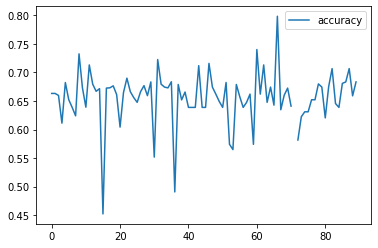

In [30]:
# creating a graph that displays the accuracy of each neighborhood (by their index in fin)
fin.plot.line()
plt.show()

In [45]:
# example of what the list looks like!
# add this to see full DF
# pd.set_option('display.max_rows', 90)
fin

,neighborhood,accuracy
0,Allegheny Center,0.663240
1,Allegheny West,0.663240
2,Allentown,0.659763
3,Arlington,0.611180
4,Arlington Heights,0.682314
...,...,...
85,UpperLawrenceville,0.680829
86,WestEnd,0.683389
87,WestOakland,0.706719
88,Westwood,0.659013


The neighborhoods with the highest rate of accuracy are Ridgemont (79.85%), Overbrook (74.01%), and Beltzhoover (73.26%). As buses not being on time is inconvenient, this makes these the most convenient neighborhoods in terms of bus accuracy.